In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
embeddings_df = pd.read_csv('/content/drive/My Drive/projekAI/embed_new.csv')
metadata_df = pd.read_csv('/content/drive/My Drive/projekAI/meta_new.csv')
print("File berhasil dimuat!")
print("Ukuran embeddings_df:", embeddings_df.shape)
print("Ukuran metadata_df:", metadata_df.shape)

File berhasil dimuat!
Ukuran embeddings_df: (27360, 1025)
Ukuran metadata_df: (27360, 10)


In [ ]:
X = embeddings_df.drop(columns=['site_id'])
y = metadata_df['disease_condition']
df = pd.concat([embeddings_df, metadata_df[['disease_condition']]], axis=1)

df = df.dropna(subset=['disease_condition'])
print("\nJumlah baris dan kolom setelah pembersihan:", df.shape)
print("5 baris pertama setelah pembersihan:")
print(df.head())


Jumlah baris dan kolom setelah pembersihan: (27360, 1026)
5 baris pertama setelah pembersihan:
            site_id  feature_0  feature_1  feature_2  feature_3  feature_4  \
0  HRCE-1_10_AA08_1   2.297975   0.022587   0.195894   0.014781  -1.100471   
1  HRCE-1_10_AA08_2   2.023117   0.055359   0.032669  -0.427921  -1.477027   
2  HRCE-1_10_AA08_3   2.311472  -0.001317  -0.237807  -0.174421  -1.027797   
3  HRCE-1_10_AA08_4   2.140031  -0.136464  -0.219615   0.169635  -1.099294   
4  HRCE-1_10_AA10_4   2.725714   0.097124  -0.251666  -0.245772  -0.611061   

   feature_5  feature_6  feature_7  feature_8  ...  feature_1015  \
0   0.098462   0.242965   0.199119  -0.567304  ...      0.781158   
1   0.555283   0.125149   0.024121  -0.310992  ...      0.687854   
2   0.333306   0.646213   0.075742  -0.196632  ...      0.554682   
3   0.623271   0.449529  -0.265632   0.208191  ...      0.361196   
4   0.599592   0.098196  -0.359271   0.068162  ...      0.885180   

   feature_1016  feature_1

In [ ]:
X = df.filter(like='feature_')
y = df['disease_condition']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("\nJumlah fitur:", X.shape[1])
print("Kelas unik:", le.classes_)
print("Contoh y_encoded (5 pertama):", y_encoded[:5])


Jumlah fitur: 1024
Kelas unik: ['Active SARS-CoV-2' 'Mock' 'UV Inactivated SARS-CoV-2']
Contoh y_encoded (5 pertama): [0 0 0 0 0]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
print("\nUkuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)


Ukuran X_train: (21888, 1024)
Ukuran X_test: (5472, 1024)
Ukuran y_train: (21888,)
Ukuran y_test: (5472,)


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd # Ensure pandas is imported

# Assuming X and y_encoded are defined from previous cells

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Kurangi ukuran data untuk menghindari memory error (opsional, hapus kalau cukup RAM)
# Store original indices before sampling
train_indices = X_train.index
test_indices = X_test.index

X_train_sampled = X_train.sample(frac=0.1, random_state=42)  # Ambil 10% data latih
# Get the indices of the sampled X_train
train_sample_indices = X_train_sampled.index
# Use these indices to select the corresponding elements from y_train
y_train_sampled = y_train[train_indices.get_indexer(train_sample_indices)]

X_test_sampled = X_test.sample(frac=0.1, random_state=42)    # Ambil 10% data uji
# Get the indices of the sampled X_test
test_sample_indices = X_test_sampled.index
# Use these indices to select the corresponding elements from y_test
y_test_sampled = y_test[test_indices.get_indexer(test_sample_indices)]


print("\nUkuran X_train setelah sampling:", X_train_sampled.shape)
print("Ukuran X_test setelah sampling:", X_test_sampled.shape)
print("Ukuran y_train setelah sampling:", y_train_sampled.shape)
print("Ukuran y_test setelah sampling:", y_test_sampled.shape)

# Get the encoded value for 'UV Inactivated SARS-CoV-2'
# Assuming 'le' (LabelEncoder) is available from a previous cell
try:
    inactive_encoded_value = le.transform(['UV Inactivated SARS-CoV-2'])[0]

    # Check for NaN/Null in X_train for 'UV Inactivated SARS-CoV-2' class
    X_train_inactive = X_train_sampled[y_train_sampled == inactive_encoded_value]
    nan_in_X_train_inactive = X_train_inactive.isnull().sum().sum()
    print(f"\nJumlah nilai NaN/Null di X_train (UV Inactivated SARS-CoV-2): {nan_in_X_train_inactive}")

    # Check for NaN/Null in X_test for 'UV Inactivated SARS-CoV-2' class
    X_test_inactive = X_test_sampled[y_test_sampled == inactive_encoded_value]
    nan_in_X_test_inactive = X_test_inactive.isnull().sum().sum()
    print(f"Jumlah nilai NaN/Null di X_test (UV Inactivated SARS-CoV-2): {nan_in_X_test_inactive}")

    # Check for NaN/Null in y_train for 'UV Inactivated SARS-CoV-2' class (should be 0 if stratify worked)
    nan_in_y_train_inactive = pd.Series(y_train_sampled[y_train_sampled == inactive_encoded_value]).isnull().sum()
    print(f"Jumlah nilai NaN/Null di y_train (UV Inactivated SARS-CoV-2): {nan_in_y_train_inactive}")

    # Check for NaN/Null in y_test for 'UV Inactivated SARS-CoV-2' class (should be 0 if stratify worked)
    nan_in_y_test_inactive = pd.Series(y_test_sampled[y_test_sampled == inactive_encoded_value]).isnull().sum()
    print(f"Jumlah nilai NaN/Null di y_test (UV Inactivated SARS-CoV-2): {nan_in_y_test_inactive}")


except NameError:
    print("\nCould not check for NaN/Null in specific class. Make sure 'le' (LabelEncoder) is defined.")


Ukuran X_train setelah sampling: (2189, 1024)
Ukuran X_test setelah sampling: (547, 1024)
Ukuran y_train setelah sampling: (2189,)
Ukuran y_test setelah sampling: (547,)

Jumlah nilai NaN/Null di X_train (UV Inactivated SARS-CoV-2): 0
Jumlah nilai NaN/Null di X_test (UV Inactivated SARS-CoV-2): 0
Jumlah nilai NaN/Null di y_train (UV Inactivated SARS-CoV-2): 0
Jumlah nilai NaN/Null di y_test (UV Inactivated SARS-CoV-2): 0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_res, y_train_res)
print("\nModel Random Forest selesai dilatih!")


Model Random Forest selesai dilatih!



Akurasi: 80.88%

Laporan Klasifikasi:
                           precision    recall  f1-score   support

        Active SARS-CoV-2       0.78      0.97      0.86      1824
                     Mock       0.83      0.91      0.87      1824
UV Inactivated SARS-CoV-2       0.83      0.54      0.66      1824

                 accuracy                           0.81      5472
                macro avg       0.81      0.81      0.80      5472
             weighted avg       0.81      0.81      0.80      5472



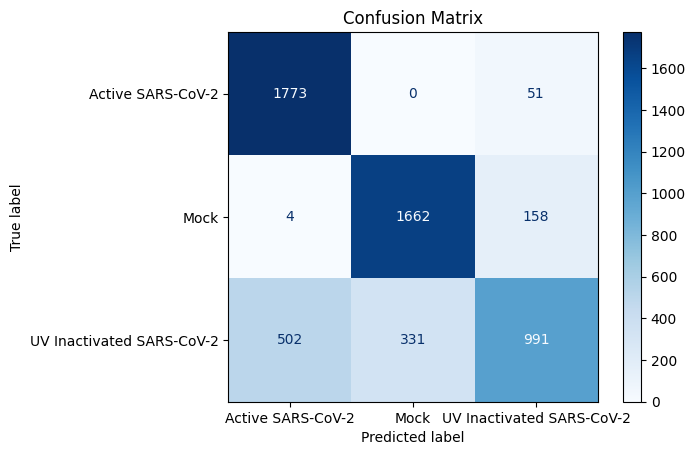

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi: {accuracy * 100:.2f}%")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()